# Absorption

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
import matplotlib
from scipy.optimize import curve_fit

#matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'errorbar.capsize': 2})
matplotlib.rcParams.update({'lines.linewidth': 2})

## Definitions

In [2]:
def thetatolamda(thetha, d, m):
    return 2*d*np.sin(2*thetha*np.pi/180)/m

def lamdatotheta(lamda,d, n):
    return np.arcsin((n *lamda)/(2*d))

def intensitylamda(Int, theta, d):
    return Int/(2*d*np.cos(theta*np.pi/180))

def gerade(x, m, t):
    return m*x+t

def kallibrate(x, m, t):
    return m*x+t

In [3]:
d = 1.9314e-10
x = 2.5e-5

## Daten

In [4]:
df_withoutFoil = pd.read_csv('HG2_23_1.STN',sep = "\s+|\t+|\s+\t+|\t+\s+",  header= None, names=['winkel', 'intensitaet', 'untergrund'], encoding = 'unicode_escape',  skiprows= list(range(0,22))) 
df_siegbrand = pd.read_csv('Siegbrand.csv', sep=',')
df_peaks = pd.read_csv('Peaks.csv', sep=',')
df_peaks2 = pd.read_csv('Peaks2.csv', sep=',')

df_withF11 = pd.read_csv('HG2_23_2.STN',sep = "\s+|\t+|\s+\t+|\t+\s+",  header= None, names=['winkel', 'intensitaet', 'untergrund'], encoding = 'unicode_escape',  skiprows= list(range(0,22))) 
df_withF8 =  pd.read_csv('HG2_23_4.STN',sep = "\s+|\t+|\s+\t+|\t+\s+",  header= None, names=['winkel', 'intensitaet', 'untergrund'], encoding = 'unicode_escape',  skiprows= list(range(0,22))) 

C:\Users\Leo\AppData\Local\Temp\ipykernel_16292\1063584204.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_withoutFoil = pd.read_csv('HG2_23_1.STN',sep = "\s+|\t+|\s+\t+|\t+\s+",  header= None, names=['winkel', 'intensitaet', 'untergrund'], encoding = 'unicode_escape',  skiprows= list(range(0,22)))
C:\Users\Leo\AppData\Local\Temp\ipykernel_16292\1063584204.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_withF11 = pd.read_csv('HG2_23_2.STN',sep = "\s+|\t+|\s+\t+|\t+\s+",  header= None, names=['winkel', 'intensitaet', 'untergrund'], encoding = 'unicode_escape',  skiprows= list(range(0,22)))


In [5]:
df_siegbrand['lamda'] = df_siegbrand['lamda']*1e-10
df_withoutFoil['theta'] = df_withoutFoil['winkel']/2

In [6]:
df_siegbrand['theta'] = np.degrees(lamdatotheta(df_siegbrand['lamda'], d, 1)/2)
df_siegbrand['theta_reflex2'] = np.degrees(lamdatotheta(df_siegbrand['lamda'], d, 2)/2)
#print(df_siegbrand)

Siegbrand beobachtete in eine Tabelle

In [7]:
df_siegbrand_beobachtet = df_siegbrand.iloc[10:,:]
df_siegbrand_beobachtet = df_siegbrand_beobachtet.drop(index=17)
df_siegbrand_beobachtet2 = df_siegbrand_beobachtet.drop(index=[18,19])

## Umrechnen

Spektrum

In [8]:
df_withoutFoil['intensitaet_lamda'] = intensitylamda(df_withoutFoil['intensitaet'], df_withoutFoil['winkel']/2,d)

## Fit

In [9]:
fit_7to12, err_fit_7to12 = curve_fit(gerade, df_peaks['angle'],df_siegbrand_beobachtet['theta'])
print(fit_7to12)

xdata = np.linspace(7,12,100)
ydata_fit7to12 = gerade(xdata, fit_7to12[0], fit_7to12[1])

fit_16to26, err_fit_16to26 = curve_fit(gerade, df_peaks2['angle'],df_siegbrand_beobachtet2['theta_reflex2'])
print(fit_16to26)

xdata = np.linspace(7,30,100)
ydata_fit7to12 = gerade(xdata, fit_7to12[0], fit_7to12[1])
ydata_fit16to26 = gerade(xdata, fit_16to26[0], fit_16to26[1])


[0.99782099 0.28794684]
[0.99254404 0.37009336]


## Plots

### Kalibrieren

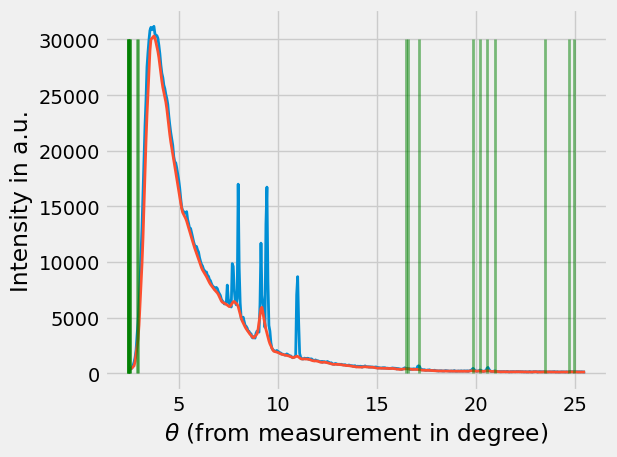

In [10]:
#print(df_withoutFoil.head())
plt.plot(df_withoutFoil.loc[:,'theta'], df_withoutFoil.loc[:,'intensitaet'], label = 'data')
plt.plot(df_withoutFoil.loc[:,'theta'], df_withoutFoil.loc[:,'untergrund'], label = 'background')
#plt.vlines(df_siegbrand['theta']-0.25, 0, 30000, label = 'peaks calc. 1st order')
plt.vlines(df_siegbrand['theta_reflex2']-0.22, 0, 30000, colors= 'g',alpha =0.5, label = 'peaks calc. 2nd order')


#plt.xlim(5,26)
#plt.ylim(100,700)

plt.xlabel(r'$\theta $ (from measurement in degree)')
plt.ylabel(r'Intensity in a.u.')
#plt.yscale('log')

plt.tight_layout()
#plt.legend(loc =3)

#plt.savefig('Calibration2Orderlog.pdf')



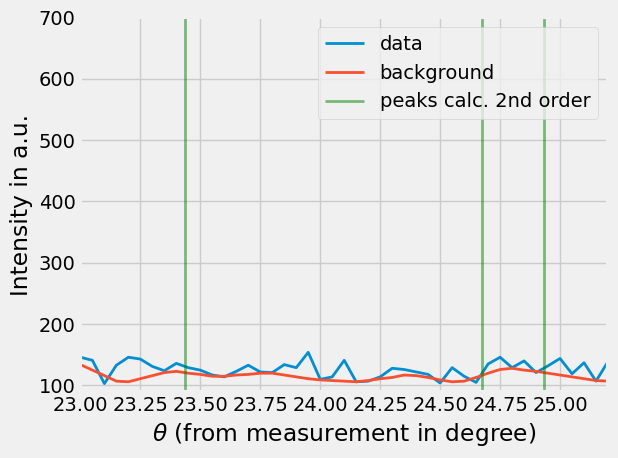

In [11]:
#print(df_withoutFoil.head())
plt.plot(df_withoutFoil.loc[:,'theta'], df_withoutFoil.loc[:,'intensitaet'], label = 'data')
plt.plot(df_withoutFoil.loc[:,'theta'], df_withoutFoil.loc[:,'untergrund'], label = 'background')
#plt.vlines(df_siegbrand['theta']-0.25, 0, 30000, label = 'peaks calc. 1st order')
plt.vlines(df_siegbrand['theta_reflex2']-0.25, 0, 30000, colors= 'g',alpha =0.5, label = 'peaks calc. 2nd order')


plt.xlim(23,25.2)
plt.ylim(90,700)

plt.xlabel(r'$\theta $ (from measurement in degree)')
plt.ylabel(r'Intensity in a.u.')


plt.tight_layout()
plt.legend()

#plt.savefig('Calibration2Order.pdf')


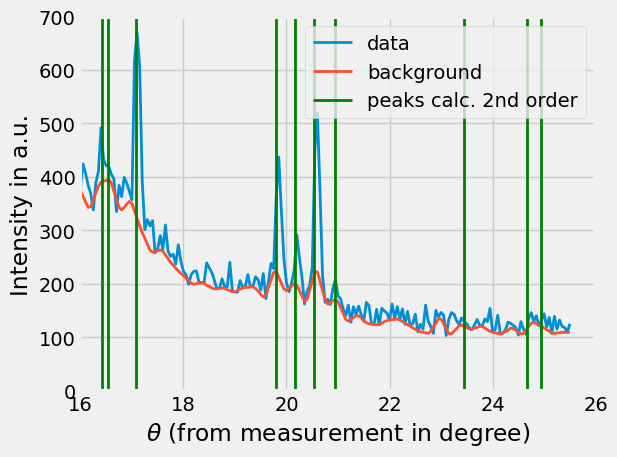

In [12]:
#print(df_withoutFoil.head())
plt.plot(df_withoutFoil.loc[:,'theta'], df_withoutFoil.loc[:,'intensitaet'], label = 'data')
plt.plot(df_withoutFoil.loc[:,'theta'], df_withoutFoil.loc[:,'untergrund'], label = 'background')
#plt.vlines(df_siegbrand['theta']-0.25, 0, 30000, label = 'peaks calc. 1st order')
plt.vlines(df_siegbrand['theta_reflex2']-0.25, 0, 30000, colors= 'g', label = 'peaks calc. 2nd order')

plt.xlim(16,26)
plt.ylim(0,700)

plt.xlabel(r'$\theta $ (from measurement in degree)')
plt.ylabel(r'Intensity in a.u.')

plt.tight_layout()
plt.legend()


### Peaks gegen Theorie

C:\Users\Leo\AppData\Local\Temp\ipykernel_16292\3792270308.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(df_peaks['angle'],df_siegbrand_beobachtet['theta'], yerr= None, xerr= df_peaks['error'],fmt='.',elinewidth= 1, ecolor= 'black', marker = 'x', color = 'r', label = 'peak position')


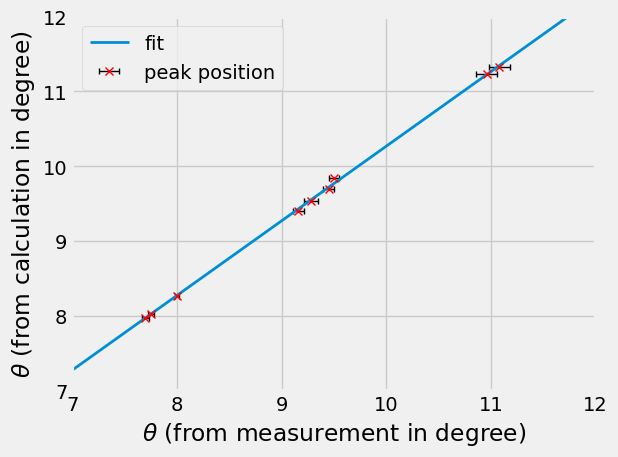

In [13]:
plt.errorbar(df_peaks['angle'],df_siegbrand_beobachtet['theta'], yerr= None, xerr= df_peaks['error'],fmt='.',elinewidth= 1, ecolor= 'black', marker = 'x', color = 'r', label = 'peak position')
plt.plot(xdata,ydata_fit7to12, label = 'fit')


plt.xlabel(r'$\theta $ (from measurement in degree)')
plt.ylabel(r'$\theta $ (from calculation in degree)')

plt.xlim(7,12)
plt.ylim(7,12)

plt.tight_layout()
plt.legend()

#plt.savefig('Eichung1ref.pdf')


C:\Users\Leo\AppData\Local\Temp\ipykernel_16292\786719981.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(df_peaks2['angle'],df_siegbrand_beobachtet2['theta_reflex2'], yerr= None, xerr= df_peaks2['error'],fmt='.',elinewidth= 1, ecolor= 'black', marker = 'x', color = 'r', label = 'peak position')


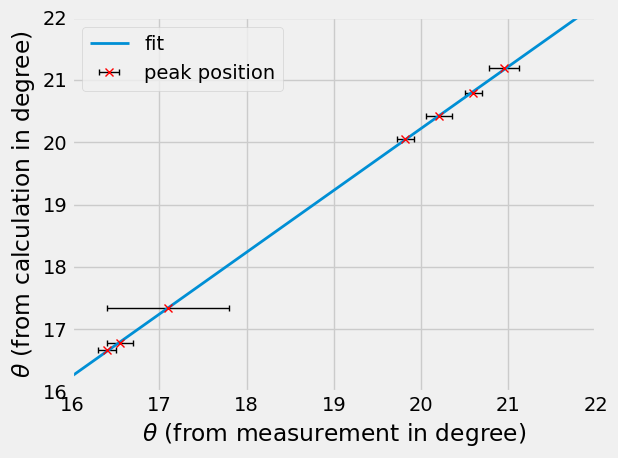

In [14]:
plt.errorbar(df_peaks2['angle'],df_siegbrand_beobachtet2['theta_reflex2'], yerr= None, xerr= df_peaks2['error'],fmt='.',elinewidth= 1, ecolor= 'black', marker = 'x', color = 'r', label = 'peak position')
plt.plot(xdata,ydata_fit16to26, label = 'fit')


plt.xlabel(r'$\theta $ (from measurement in degree)')
plt.ylabel(r'$\theta $ (from calculation in degree)')


plt.xlim(16,22)
plt.ylim(16,22)

plt.tight_layout()
plt.legend()

#plt.savefig('Eichung2ref.pdf')

## Daten kallibrieren

In [15]:
df_withoutFoil['theta_korr'] = kallibrate(df_withoutFoil['theta'], fit_16to26[0], fit_16to26[1])


In [16]:
df_withoutFoil['wellenlaenge'] = thetatolamda(df_withoutFoil.loc[:,'winkel']/2,d,1) 
df_withoutFoil['wellenlaengeinAnstrom'] = df_withoutFoil['wellenlaenge'] * 1e10

df_withF11['theta'] = df_withF11['winkel']
df_withF11['theta_korr'] = kallibrate(df_withF11['theta'], fit_16to26[0], fit_16to26[1])

df_withF11['wellenlaenge'] = thetatolamda(df_withF11.loc[:,'winkel']/2,d,1) 
df_withF11['wellenlaengeinAnstrom'] = df_withF11['wellenlaenge'] * 1e10

df_withF8['theta'] = df_withF8['winkel']
df_withF8['theta_korr'] = kallibrate(df_withF8['theta'], fit_16to26[0], fit_16to26[1])

df_withF8['wellenlaenge'] = thetatolamda(df_withF8.loc[:,'winkel']/2,d,1) 
df_withF8['wellenlaengeinAnstrom'] = df_withF8['wellenlaenge'] * 1e10

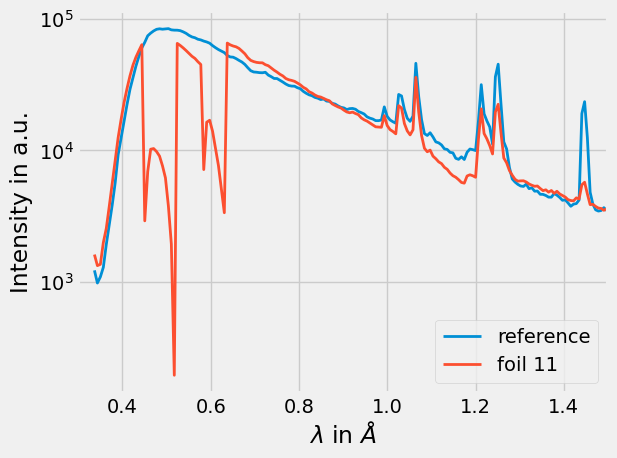

In [17]:
plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], 2.7*df_withoutFoil['intensitaet'], label = 'reference')
plt.plot(df_withF11['wellenlaengeinAnstrom'], df_withF11['intensitaet'], label = 'foil 11')

plt.xlabel(r'$\lambda $ in $\AA$')
plt.ylabel(r'Intensity in a.u.')
plt.yscale('log')
#plt.gca().set_aspect(0.5)

plt.xlim(0.3,1.5)
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 

plt.tight_layout()
plt.legend()

plt.savefig('absorptionskanteFitt.pdf')

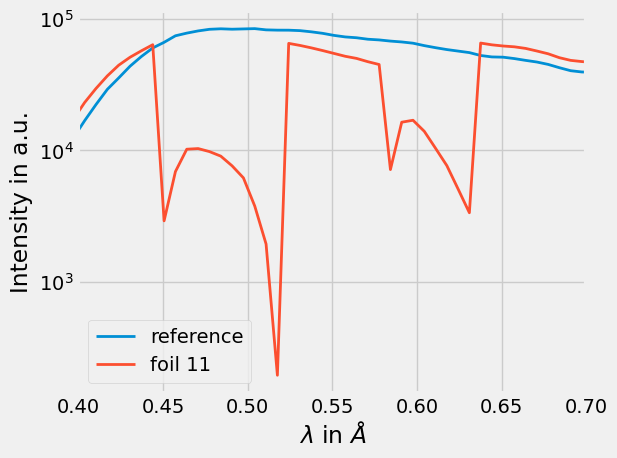

In [18]:
plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], 2.7*df_withoutFoil['intensitaet'], label = 'reference')
plt.plot(df_withF11['wellenlaengeinAnstrom'], df_withF11['intensitaet'], label = 'foil 11')

plt.xlabel(r'$\lambda $ in $\AA$')
plt.ylabel(r'Intensity in a.u.')
plt.yscale('log')
#plt.gca().set_aspect(0.5)

plt.xlim(0.4,0.7)
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 

plt.tight_layout()
plt.legend()

#plt.savefig('absorptionskanteFitt.pdf')
plt.show()

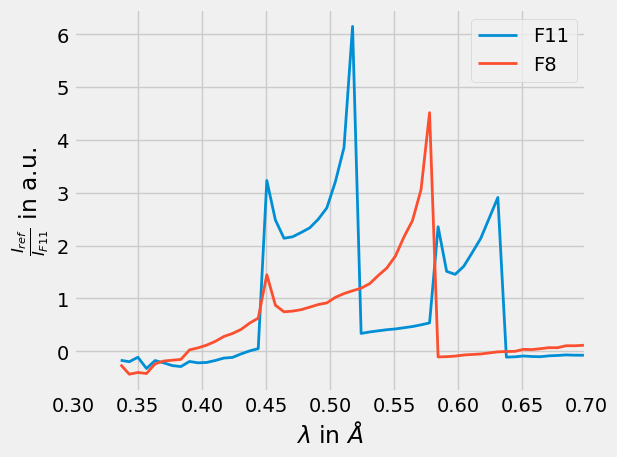

In [19]:
fehlerAbsorb = 0.07*1/x

# plt.errorbar(df_withoutFoil['wellenlaengeinAnstrom'],1/x * np.log(3 * df_withoutFoil['intensitaet'] / df_withF11['intensitaet']), yerr= fehlerAbsorb , xerr= None,fmt='.',elinewidth= 1, ecolor= 'black', marker = 'x', color = 'r', label = 'F11')






plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], np.log(3 * df_withoutFoil['intensitaet'] / df_withF11['intensitaet']), ls= None,  label = 'F11')
plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], np.log(2.3 * df_withoutFoil['intensitaet'] / df_withF8['intensitaet']), label = 'F8')



plt.xlabel(r'$\lambda $ in $\AA$')
plt.ylabel(r'$\frac{I_{ref}}{I_{F11}}$ in a.u.')
#plt.yscale('log')
#plt.gca().set_aspect(0.5)

plt.xlim(0.3,0.7)
#plt.ylim(0,4)
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 

plt.tight_layout()
plt.legend()
plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_16292\2300958246.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(df_withoutFoil['wellenlaengeinAnstrom'],1/x * np.log(3 * df_withoutFoil['intensitaet'] / df_withF11['intensitaet']), yerr= fehlerAbsorb , xerr= None,fmt='.',elinewidth= 1, ecolor= 'black', marker = 'x', color = 'r', label = 'F11')


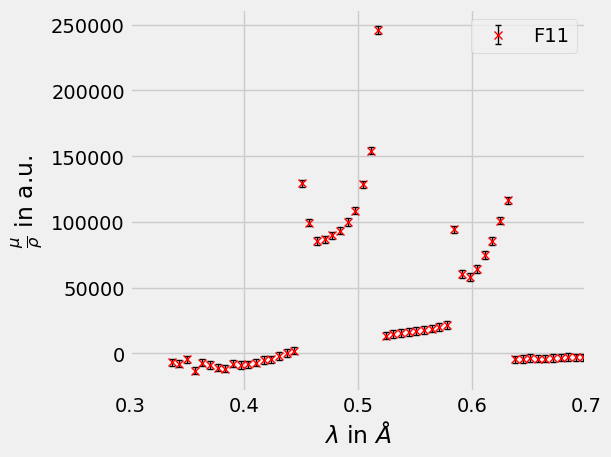

In [24]:
fehlerAbsorb = 0.07*1/x

plt.errorbar(df_withoutFoil['wellenlaengeinAnstrom'],1/x * np.log(3 * df_withoutFoil['intensitaet'] / df_withF11['intensitaet']), yerr= fehlerAbsorb , xerr= None,fmt='.',elinewidth= 1, ecolor= 'black', marker = 'x', color = 'r', label = 'F11')






# plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], np.log(3 * df_withoutFoil['intensitaet'] / df_withF11['intensitaet']), ls= None,  label = 'F11')
# plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], np.log(2.3 * df_withoutFoil['intensitaet'] / df_withF8['intensitaet']), label = 'F8')



plt.xlabel(r'$\lambda $ in $\AA$')
plt.ylabel(r'$\frac{\mu}{\rho}$ in a.u.')
#plt.yscale('log')
#plt.gca().set_aspect(0.5)

plt.xlim(0.3,0.7)
#plt.ylim(0,4)
# matplotlib.rc('xtick', labelsize=12) 
# matplotlib.rc('ytick', labelsize=12) 

plt.tight_layout()
plt.legend()
plt.show()

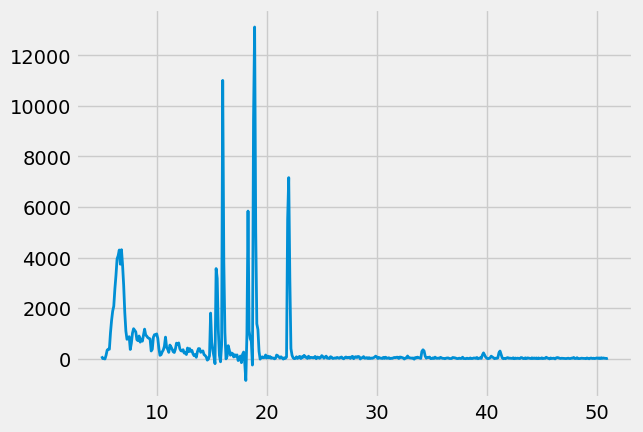

In [20]:
plt.plot(df_withoutFoil.loc[:,'winkel'], df_withoutFoil.loc[:,'intensitaet']-df_withoutFoil.loc[:,'untergrund'])


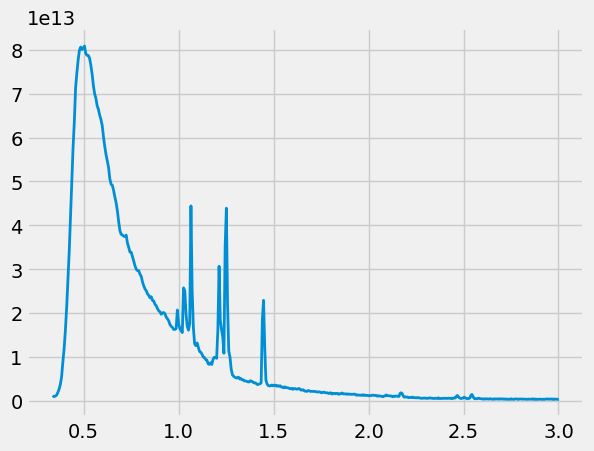

In [21]:
plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], df_withoutFoil['intensitaet_lamda'])
#plt.vlines(2)